In [60]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2


camera_to_ground_distance = .2
depth_threshold = 0.002
camera_fov_degrees = 40

thresh_value = .01
max_value = 1
# Load the depth data
depth_clean = np.load('phase_img_clean.npy')
depth_car = np.load('phase_img_small.npy')

# Subtract the clean plate from the car depth data
import cv2
import numpy as np

# Assuming depth_car and depth_clean are your depth images
diff = cv2.absdiff(depth_car, depth_clean)

# Apply a Gaussian blur to reduce noise
diff_blurred = cv2.GaussianBlur(diff, (5, 5), 0)

# Threshold the image to create a binary image
_, thresholded = cv2.threshold(diff_blurred, thresh_value, max_value, cv2.THRESH_BINARY)

# Perform morphological operations to reduce noise
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

opening_8bit = (opening * 255).astype('uint8')

# Find connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(opening_8bit, connectivity=8)

# Identify the label of the car based on the size of the connected component
car_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1  # ignore background label 0

# Create an image that only includes the car
car_image = np.where(labels == car_label, 255, 0).astype('uint8')





# Camera parameters
fov = math.radians(camera_fov_degrees)  # convert to radians
distance = camera_to_ground_distance

# Calculate the width of a single pixel in the real world
field_width = 2 * distance * math.tan(fov / 2)
pixel_width = field_width / depth_car.shape[1]

# Calculate the car's width in the real world
#car_width = car_width_pixels * pixel_width
#car_width

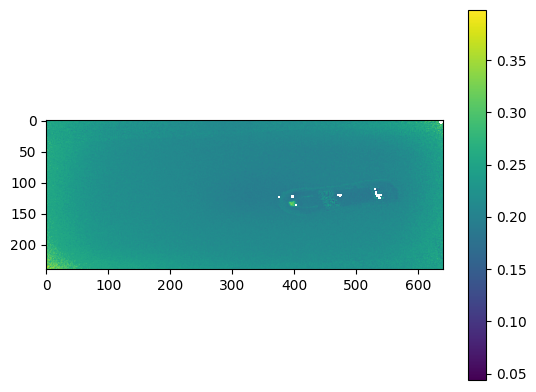

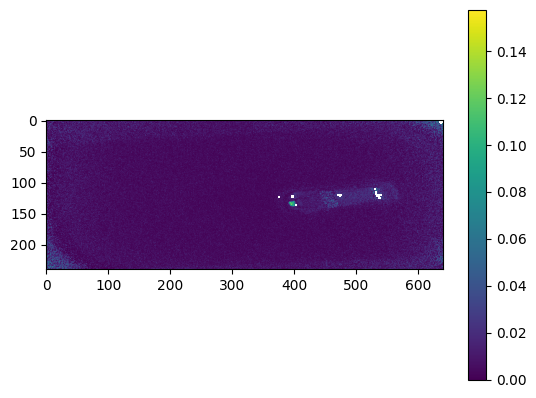

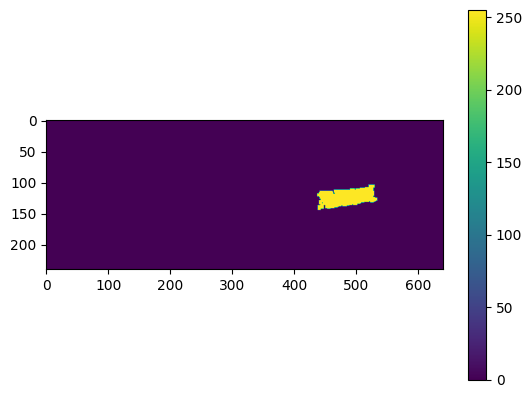

In [61]:
plt.imshow(depth_car)
plt.colorbar()
plt.show()
plt.imshow(diff)
plt.colorbar()
plt.show()
plt.imshow(car_image)
plt.colorbar()
plt.show()